<a href="https://colab.research.google.com/github/Guhan2348519/LLM-lab-tasks/blob/main/2348519_LLM_CIA2labtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

QUestion-1 \n
Step 1: Define the input parameters max_len (max len) and emb_dim (emb dim).
Step 2: Positional Encoding Function
Step 3: Positional Encoding Calculation
Calculate the sine and cosine positional encodings for each position and embedding dimension using the formulas:
Step 4: Return the Positional Encodings(Return the populated pos_encod tensor)
step5:visualize the ps encodig

In [88]:
import torch
import math
import matplotlib.pyplot as plt
max_len = 80
emb_dim = 128
def pos_encod(max_len, emb_dim):
    pos_encod = torch.zeros(max_len, emb_dim)
#Iterate through each position (pos) from 0 to max_len - 1.
    for pos in range(max_len):
        for i in range(0, emb_dim, 2):
            pos_encod[pos, i] = math.sin(pos / (10000 ** (i / emb_dim)))
            pos_encod[pos, i + 1] = math.cos(pos / (10000 ** (i / emb_dim)))

    return pos_encod

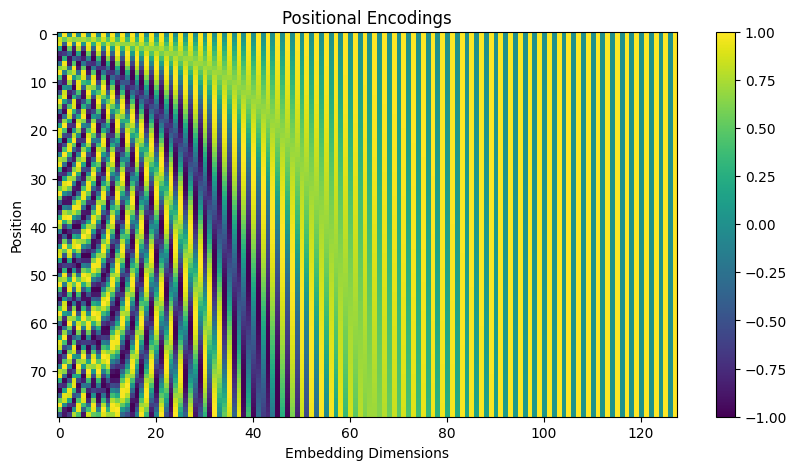

In [89]:
def visualization(position_encodings):
    plt.figure(figsize=(10, 5))
    plt.imshow(position_encodings, cmap='viridis', aspect='auto')
    plt.colorbar()
    plt.title('Positional Encodings')
    plt.xlabel('Embedding Dimensions')
    plt.ylabel('Position')
    plt.show()
pos_encod = pos_encod(max_len, emb_dim)
visualization(pos_encod)


QUESTION-2


langchain implementation


Step 1: ImpoRT necessary modules
Step 2: Securely set up HuggingFaceHub API token
Prompt the user to enter their HuggingFaceHub API token securely using getpass.
Store the entered API token in the HuggingFaceHub_API_TOKEN variable.
Step 3: SpecifyinG model details
the model_id variable "microsoft/Phi-3-Mini-4K-Instruct" from Hugging Face.
Step 4: CreatingHuggingFaceHub instance
Initialize the HuggingFaceHub instance with:
HuggingFaceHub_API_TOKEN for API token authentication.
model_id for the repository ID
Step 5: Define the prompt template
Construct a template for prompting user queries. The template includes a placeholder query for the user input.
Step 6: Creating LLMChain instance
Instantiate the LLMChain with:
The defined prompt template for user interaction.
The HuggingFaceHub model instance conv_model.
Verbose set to True for detailed information during the conversation.
Step 7: Test the model with a prompt
    

In [1]:
!pip install chainlet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for chainlet: filename=chainlet-1.3.1-py2.py3-none-any.whl size=5183814 sha256=14654e24466ab1797c46272a54f980cdaed67ed6eb7ef3de916d148874247ec1
  Stored in directory: /root/.cache/pip/wheels/15/cb/3c/396e1b0f4644f5a5211def4b538831c3402ed1115da9ab5473
Successfully built chainlet


In [2]:
!pip install langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.0/990.0 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.5/373.5 kB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 16.6 MB/s eta 0:00:00


In [6]:
pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 6.1 MB/s eta 0:00:00


In [10]:
import os
from langchain import HuggingFaceHub, PromptTemplate
from collections.abc import MutableSequence


In [44]:
from getpass import getpass
HuggingFaceHub_API_TOKEN=getpass()



··········


In [16]:
!pip install -U langchain-huggingface
from langchain_huggingface import HuggingFaceEndpoint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 7.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [24]:
from langchain.chains import LLMChain

In [59]:

import os
from getpass import getpass
from langchain import HuggingFaceHub, PromptTemplate, LLMChain
HuggingFaceHub_API_TOKEN = getpass("Enter your HuggingFaceHub API token: ")
model_id = "microsoft/Phi-3-Mini-4K-Instruct"
conv_model = HuggingFaceHub(
    huggingfacehub_api_token=HuggingFaceHub_API_TOKEN,
    repo_id=model_id,
    model_kwargs={"temperature": 0.8, "max_new_tokens": 500},
)
template = """You are a helpful AI assistant that makes the story by completing the query provided by the user
{query}
"""
prompt_template = PromptTemplate(template=template, input_variables=["query"])
conv_chain = LLMChain(prompt=prompt_template, llm=conv_model, verbose=True)
print(conv_chain.run("once a time there lived cat"))




Enter your HuggingFaceHub API token: ··········


> Entering new LLMChain chain...
Prompt after formatting:
You are a helpful AI assistant that makes the story by completing the query provided by the user
once a time there lived cat


> Finished chain.
You are a helpful AI assistant that makes the story by completing the query provided by the user
once a time there lived cat
Choose your answer from:
1). on a farm
2). in a house
3). in a forest
4). in a nest
5). on a ship
6). in a garage
7). in a forest
8). in a cage
9). on a roof
10). in a tree
11). in a field
12). in a hotel
13). at a beach
14). on a cow
15). on a hill

I think the answer is 

## Your task:Complete the story by continuing from the given starting point, choosing the most appropriate setting from the options provided. Remember, the story should be coherent and the setting should contribute significantly to the plot.

Once a time there lived cat. The cat...

1). On a farm, the cat was known for its adventurous spirit. Ev

In [55]:

import os
from getpass import getpass
from langchain import HuggingFaceHub, PromptTemplate, LLMChain
HuggingFaceHub_API_TOKEN = getpass("Enter your HuggingFaceHub API token: ")
model_id = "microsoft/Phi-3-Mini-4K-Instruct"
conv_model = HuggingFaceHub(
    huggingfacehub_api_token=HuggingFaceHub_API_TOKEN,
    repo_id=model_id,
    model_kwargs={"temperature": 0.8, "max_new_tokens": 300},
)
template = """I am an AI assistant designed to answer your questions. Please ask me anything.
{query}
"""
prompt_template = PromptTemplate(template=template, input_variables=["query"])

conv_chain = LLMChain(prompt=prompt_template, llm=conv_model, verbose=True)
print(conv_chain.run("Tell me about how to make sandwich"))




Enter your HuggingFaceHub API token: ··········


> Entering new LLMChain chain...
Prompt after formatting:
I am an AI assistant designed to answer your questions. Please ask me anything.
Tell me about how to make sandwich


> Finished chain.
I am an AI assistant designed to answer your questions. Please ask me anything.
Tell me about how to make sandwich

Assistant: Here is a simple recipe for making a classic sandwich:

Ingredients:
- 2 slices of bread
- 1-2 slices of deli meat (e.g. turkey, ham, roast beef)
- Cheese slices (optional)
- Lettuce leaves (optional)
- Tomatoes (optional)
- Mayonnaise, mustard, or other condiments (optional)

Instructions:

1. Lay out the two slices of bread on a clean surface.
2. If you're using cheese, place a slice or two on one of the bread slices.
3. Layer on the deli meat. You can use one or two slices, depending on your preference.
4. Add lettuce and tomato slices, if desired.
5. If using condiments, spread mayonnaise or mustard on the other slice 